In [1]:
!pip install tweepy textblob

  Obtaining dependency information for tweepy from https://files.pythonhosted.org/packages/4d/78/ba0065d5636bbf4a35b78c4f81b74e7858b609cdf69e629d6da5c91b9d92/tweepy-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
  Obtaining dependency information for oauthlib<4,>=3.2.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for requests-oauthlib<2,>=1.2.0 from https://files.pythonhosted.org/packages/6f/bb/5deac77a9af870143c684ab46a7934038a53eb4aa975bc0687ed6ca2c610/requests_oauthlib-1.3.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ------------------------------------- -- 92.2/98.5 kB 2.6 MB/s eta 0:00:01
  

In [2]:
import tweepy
from textblob import TextBlob
import pandas as pd

# Load the data
data = pd.read_csv('twitter_validation.csv')

In [12]:
data = pd.read_csv("twitter_validation.csv")
data.head(1000)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [22]:
def fetch_and_analyze_tweets(query, count=100):
    # Set up the Twitter API credentials
    consumer_key = 'your_consumer_key'
    consumer_secret = 'your_consumer_secret'
    access_token = 'your_access_token'
    access_token_secret = 'your_access_token_secret'

    # Authenticate with the Twitter API
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    # Fetch the tweets
    tweets = api.search(q=query, count=count)

    # Perform sentiment analysis
    sentiment_scores = []
    for tweet in tweets:
        analysis = TextBlob(tweet.text)
        sentiment_scores.append(analysis.sentiment.polarity)

    return sentiment_scores

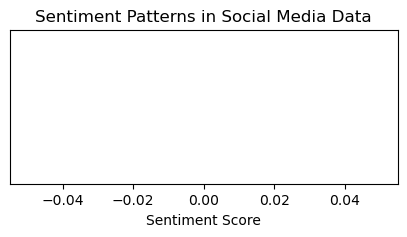

In [23]:
import matplotlib.pyplot as plt

# Calculate the average sentiment score for each topic or brand
average_sentiment_scores = {query: sum(scores) / len(scores) for query, scores in sentiment_scores.items()}

# Sort the topics or brands by their average sentiment score
sorted_queries = sorted(average_sentiment_scores.items(), key=lambda x: x[1], reverse=True)

# Create a bar chart to visualize the sentiment patterns
plt.figure(figsize=(5, 2))
plt.barh(range(len(sorted_queries)), [score for query, score in sorted_queries], color='skyblue')
plt.yticks(range(len(sorted_queries)), [query for query, score in sorted_queries])
plt.xlabel('Sentiment Score')
plt.title('Sentiment Patterns in Social Media Data')
plt.show()

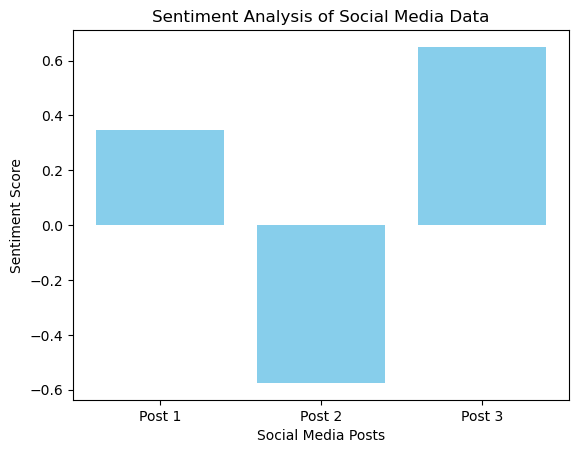

In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sample social media data
data = ["I love the new product! #excited", "Not happy with the service. #disappointed", "Great experience with the brand. #satisfied"]

# Analyzing sentiment using TextBlob
sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in data]

# Visualizing sentiment patterns
plt.bar(range(len(data)), sentiment_scores, color='skyblue')
plt.xlabel('Social Media Posts')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Social Media Data')
plt.xticks(range(len(data)), ['Post 1', 'Post 2', 'Post 3'])
plt.show()
